# Project: Wrangling and Analyze Data

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. WeRateDogs has over 4 million followers and has received international media coverage. we will wrangle 3 different data from this account for our analysis.

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) from udacity.com

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from functools import reduce
%matplotlib inline

df1 = pd.read_csv('twitter-archive-enhanced-2.csv')


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [ ]:
import requests as req

with req.get(r'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv') as rq:
             with open('image-predictions.tsv', 'wb') as file:
                 file.write(rq.content)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
import json
from tweepy import OAuthHandler

consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
fails_dict = {}
tweet_ids = df1.tweet_id.values
count = 0

with open('tweet_json.txt', 'w') as outfile:
    # loop to get each id in df1
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')#writes a json in newline 
        except Exception as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
        
print(fails_dict)

In [3]:
import json
#creating dataframe  
tweet_df = []
with open('tweet_json.txt', 'r') as fh:
    for line in fh:
        tweets = json.loads(line)
        tweet_id = tweets['id']
        created_at = tweets['created_at']
        favorite_count = tweets['favorite_count']
        retweet_count = tweets['retweet_count']

    
        tweet_df.append({'tweet_id':tweet_id,
                       'created_at':created_at,
                       'favorite_count':favorite_count,
                       'retweet_count':retweet_count})
df3 = pd.DataFrame(tweet_df, columns = ['tweet_id', 'created_at', 'favorite_count', 'retweet_count'])


In [4]:
df2 = pd.read_csv("image-predictions.tsv",sep="\t")

## Assessing Data

In [5]:
df1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2087,670797304698376195,NaN,NaN,2015-11-29 02:51:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Trigger. He was minding his own busine...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670797304...,11,10,Trigger,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1978,672984142909456390,NaN,NaN,2015-12-05 03:41:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very happy pup here. Always smiling. Loves his...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672984142...,9,10,None,None,None,None,None
1391,700143752053182464,NaN,NaN,2016-02-18 02:24:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When it's Janet from accounting's birthday but...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700143752...,10,10,None,None,None,pupper,None
1384,700796979434098688,NaN,NaN,2016-02-19 21:39:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daniel. He's a neat pup. Exotic af. Cu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700796979...,7,10,Daniel,None,None,None,None
158,861005113778896900,NaN,NaN,2017-05-06 23:49:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Burt. He thinks your thesis statement ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/861005113...,12,10,Burt,None,None,None,None
220,850019790995546112,NaN,NaN,2017-04-06 16:18:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Boomer. He's a sandy pupper. Havi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/850019790...,12,10,Boomer,None,None,pupper,None
2315,666691418707132416,NaN,NaN,2015-11-17 18:56:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Christoper. He is a spotted Penne. Can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666691418...,8,10,Christoper,None,None,None,None
1826,676440007570247681,NaN,NaN,2015-12-14 16:34:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hope your Monday isn't too awful. Here's two b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676440007...,11,10,None,None,None,None,None
351,831322785565769729,NaN,NaN,2017-02-14 02:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pete. He has no eyes. Needs a guide do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831322785...,12,10,Pete,doggo,None,None,None


In [6]:
df2.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1711,818536468981415936,https://pbs.twimg.com/media/C1wGkYoVQAAuC_O.jpg,1,swing,0.999403,False,Welsh_springer_spaniel,0.000062,True,bow,0.000030,False
1110,724004602748780546,https://pbs.twimg.com/media/CgwuWCeW4AAsgbD.jpg,3,Siamese_cat,0.950526,False,pug,0.018877,True,quilt,0.007628,False
1607,800513324630806528,https://pbs.twimg.com/media/Cxv-nkJUoAAhzMt.jpg,1,Pembroke,0.828904,True,Cardigan,0.167373,True,Chihuahua,0.000766,True
429,674265582246694913,https://pbs.twimg.com/media/CVt49k_WsAAtNYC.jpg,1,slug,0.998075,False,ice_lolly,0.000984,False,leafhopper,0.000097,False
815,692752401762250755,https://pbs.twimg.com/tweet_video_thumb/CZ0mhd...,1,Samoyed,0.471276,True,Siberian_husky,0.158850,True,Eskimo_dog,0.138672,True
2020,880872448815771648,https://pbs.twimg.com/media/DDl8zzJW0AAisCJ.jpg,1,Pembroke,0.791416,True,Norwich_terrier,0.061393,True,Chihuahua,0.033726,True
1468,778990705243029504,https://pbs.twimg.com/media/Cs-H5uhWcAAiNY9.jpg,2,cocker_spaniel,0.715351,True,Labrador_retriever,0.207056,True,Chihuahua,0.028519,True
355,672594978741354496,https://pbs.twimg.com/media/CVWJkJXWsAInlZl.jpg,1,Great_Pyrenees,0.755945,True,Old_English_sheepdog,0.082337,True,Afghan_hound,0.027037,True
663,682662431982772225,https://pbs.twimg.com/media/CXlN1-EWMAQdwXK.jpg,1,beagle,0.413824,True,Cardigan,0.263553,True,basset,0.167618,True
1460,778039087836069888,https://pbs.twimg.com/media/CswmaHmWAAAbdY9.jpg,2,German_shepherd,0.717776,True,malinois,0.111175,True,Norwegian_elkhound,0.058802,True


In [7]:
df3.sample(10)

,tweet_id,created_at,favorite_count,retweet_count
1962,672622327801233409,Fri Dec 04 03:43:54 +0000 2015,1146,419
2158,668979806671884288,Tue Nov 24 02:29:49 +0000 2015,700,291
386,824025158776213504,Tue Jan 24 22:44:42 +0000 2017,4567,556
1645,682303737705140231,Wed Dec 30 20:54:22 +0000 2015,2811,883
888,757354760399941633,Sun Jul 24 23:20:20 +0000 2016,4199,1298
1164,717790033953034240,Wed Apr 06 19:04:14 +0000 2016,2632,985
1466,692568918515392513,Thu Jan 28 04:44:32 +0000 2016,4028,1392
2261,667171260800061440,Thu Nov 19 02:43:18 +0000 2015,186,71
2318,666057090499244032,Mon Nov 16 00:55:59 +0000 2015,247,111
65,879415818425184262,Mon Jun 26 19:07:24 +0000 2017,92509,37266


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
df1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [10]:
df1.duplicated().sum()

0

In [11]:
print(df2.isnull().sum())

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   int64 
 1   created_at      2327 non-null   object
 2   favorite_count  2327 non-null   int64 
 3   retweet_count   2327 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 63.7+ KB


In [14]:
df3.isnull().sum()

tweet_id          0
created_at        0
favorite_count    0
retweet_count     0
dtype: int64

### Quality issues
1.Missing names in df1's name column

2.wrong data type of df1's timestamp column

3.Null values in df1's expanded_url column

4.wrong date type on df3's created_at column

5.Null values in df1's in_reply_to_status_id and in_reply_to_user_id columns

6.Bad datatype for tweet_id in df1

7.Bad column names in df1

8.Bad datatype for tweet_id in df2 and df3

### Tidiness issues
1. Droping all retweet and in_reply columns

2. Droping all null values 

## Cleaning Data

In [15]:
# Make copies of original pieces of data
df1_copy = df1.copy()
df2_copy = df2.copy()
df3_copy = df3.copy()

In [16]:
df1['name'].dropna(inplace=True)

In [18]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'])#changing datatype of timestamp in df1 to datetime

In [20]:
df1['expanded_urls'].dropna(inplace=True)#dropping null values in expanded_urls column in df1

In [21]:
df3['created_at'] = pd.to_datetime(df3['created_at'])#changing datatype of created_at to datetime

In [22]:
df1.rename({'text': 'about_dog'}, axis='columns', inplace=True)#renaming text column of df1

In [23]:
df1 = df1.astype({'tweet_id':str})#changing datatypes of df1, df2 and df3
df2 = df2.astype({'tweet_id':str})
df3 = df3.astype({'tweet_id':str})

In [24]:
data = [df1, df2, df3]#merging the three dataframes
df = reduce(lambda left, right: pd.merge(left, right, on=['tweet_id']), data)
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,about_dog,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,2017-08-01 16:23:56+00:00,33698,6970
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,2017-08-01 00:17:27+00:00,29225,5272
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31 00:18:03+00:00,21978,3464
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,2017-07-30 15:58:51+00:00,36793,7191
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,2017-07-29 16:00:24+00:00,35185,7718


### Issue #1:

#### Define: Droping all retweet  and in_reply columns

#### Code

In [25]:
df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [26]:
df.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis=1, inplace=True)#droping in_reply_to_user_id and in_reply_to_status_id 

#### Test

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2057 non-null   object             
 1   timestamp           2057 non-null   datetime64[ns, UTC]
 2   source              2057 non-null   object             
 3   about_dog           2057 non-null   object             
 4   expanded_urls       2057 non-null   object             
 5   rating_numerator    2057 non-null   int64              
 6   rating_denominator  2057 non-null   int64              
 7   name                2057 non-null   object             
 8   doggo               2057 non-null   object             
 9   floofer             2057 non-null   object             
 10  pupper              2057 non-null   object             
 11  puppo               2057 non-null   object             
 12  jpg_url             2057 non-null 

### Issue #2:

#### Define: Droping all null values

#### Code

In [28]:
df.isnull().sum()

tweet_id              0
timestamp             0
source                0
about_dog             0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
jpg_url               0
img_num               0
p1                    0
p1_conf               0
p1_dog                0
p2                    0
p2_conf               0
p2_dog                0
p3                    0
p3_conf               0
p3_dog                0
created_at            0
favorite_count        0
retweet_count         0
dtype: int64

#### Test

In [30]:
df.isnull().sum()

0

## Storing Data
Saving gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [31]:
df.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data

In [32]:

df_clean = pd.read_csv('twitter_archive_master.csv')
df_clean.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,2.057000e+03,2057.000000,2057.00000,2057.000000,2057.000000,2.057000e+03,2.057000e+03,2057.000000,2057.000000
mean,7.377684e+17,12.265921,10.51580,1.204181,0.594274,1.348003e-01,6.042487e-02,7415.610598,2351.818182
std,6.756840e+16,40.857799,7.20826,0.563240,0.271223,1.007304e-01,5.100092e-02,11222.094962,4112.138728
min,6.660209e+17,0.000000,2.00000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,11.000000
25%,6.762374e+17,10.000000,10.00000,1.000000,0.363272,5.390140e-02,1.624560e-02,1404.000000,500.000000
50%,7.110080e+17,11.000000,10.00000,1.000000,0.587764,1.186470e-01,4.948690e-02,3240.000000,1110.000000
75%,7.928838e+17,12.000000,10.00000,1.000000,0.843911,1.959500e-01,9.219820e-02,9239.000000,2707.000000
max,8.924206e+17,1776.000000,170.00000,4.000000,1.000000,4.880140e-01,2.734190e-01,144256.000000,70335.000000


In [33]:
df.groupby('p1').mean().favorite_count

p1
Afghan_hound           10994.250000
African_crocodile        808.000000
African_grey            4492.000000
African_hunting_dog     1455.000000
Airedale                4477.083333
                           ...     
wombat                  6460.750000
wood_rabbit             2111.333333
wooden_spoon           13878.000000
wool                    1578.000000
zebra                   1277.000000
Name: favorite_count, Length: 377, dtype: float64

In [34]:
df.groupby('p2').mean().favorite_count

p2
Afghan_hound                      12254.600000
African_hunting_dog                 393.000000
Airedale                           5005.142857
American_Staffordshire_terrier    11477.157895
American_alligator                  787.000000
                                      ...     
window_screen                      9086.250000
window_shade                       4171.000000
wire-haired_fox_terrier            3156.000000
wombat                             2366.000000
wood_rabbit                        1018.000000
Name: favorite_count, Length: 402, dtype: float64

In [35]:
df.describe().favorite_count

count      2057.000000
mean       7415.610598
std       11222.094962
min           0.000000
25%        1404.000000
50%        3240.000000
75%        9239.000000
max      144256.000000
Name: favorite_count, dtype: float64

### Insights:
1. it seems there is a correlation between favorite_count and retweet_count the higher the favorite_count, the higher the retweet_count

2. dogs from p1 category recieved more ratings, favourite_count and retweet_count

3.

### Visualization

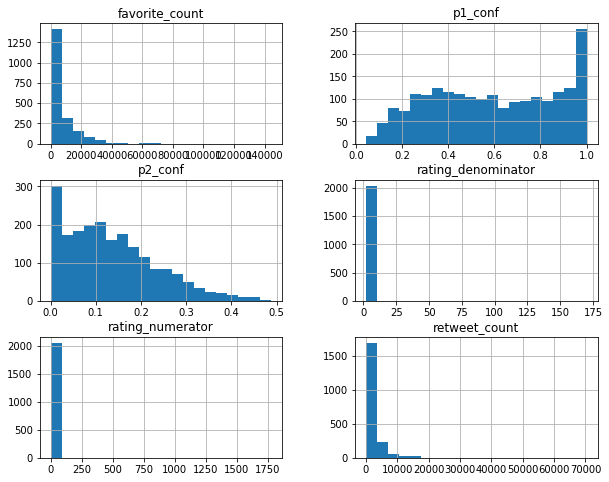

In [94]:
df_clean[['rating_numerator','favorite_count','retweet_count', 'rating_denominator', 'p1_conf','p2_conf']].hist(figsize=(10,8), bins=20);

##### A histogram showing the the distribution of rating_numerator, favorite_count, retweet_count, rating_denominator, p1_conf and p2_conf

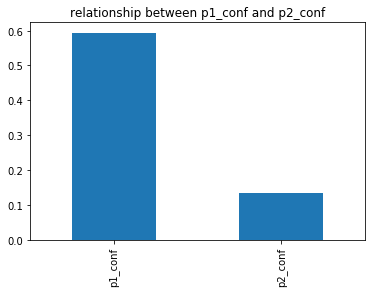

In [95]:
df_clean[['p1_conf','p2_conf']].mean().plot(kind='bar', title='relationship between p1_conf and p2_conf');

#### A bar chart showing  the mean distribution of p1_conf and p2_conf

###### is rating_numerator associated with favorite_count?

[Text(0.5, 1.0, 'relationship between rating_numerator and favorite_count')]

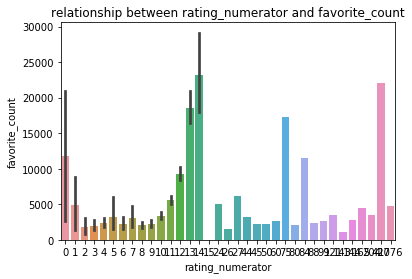

In [100]:
sns.barplot(x='rating_numerator', y='favorite_count', data=df_clean).set(title='relationship between rating_numerator and favorite_count')

#### A bar chart showing the correlation between rating_numerator and favorite_count

[Text(0.5, 1.0, 'relationship between retweet_count and favorite_count')]

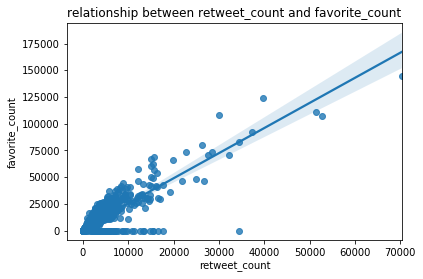

In [101]:
sns.regplot(x='retweet_count', y='favorite_count', data=df_clean).set(title='relationship between retweet_count and favorite_count')

#### A reg or scatter plot showing the correlation between retweet_count and favorite_count